# Principal Components Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
#Generating Random Data for PCA analysis
np.random.seed(10)

n_samples = 300 #number of observations
n_features = 10 #number of features 
data = np.random.randn(n_samples, n_features) 
features_name = [f'feature_{i}' for i in range(1, n_features+1)]

data = pd.DataFrame(data, columns=features_name)
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.331587,0.715279,-1.545400,-0.008384,0.621336,-0.720086,0.265512,0.108549,0.004291,-0.174600
1,0.433026,1.203037,-0.965066,1.028274,0.228630,0.445138,-1.136602,0.135137,1.484537,-1.079805
2,-1.977728,-1.743372,0.266070,2.384967,1.123691,1.672622,0.099149,1.397996,-0.271248,0.613204
3,-0.267317,-0.549309,0.132708,-0.476142,1.308473,0.195013,0.400210,-0.337632,1.256472,-0.731970
4,0.660232,-0.350872,-0.939433,-0.489337,-0.804591,-0.212698,-0.339140,0.312170,0.565153,-0.147420
...,...,...,...,...,...,...,...,...,...,...
295,0.666061,1.146979,-1.546893,1.284133,1.130128,-0.561086,-1.169689,1.592758,-1.217838,-0.341861
296,-1.591588,0.524357,0.878601,-0.248818,-0.324638,1.055082,-1.413424,0.203613,-1.196159,-0.258973
297,0.482322,-1.032306,1.710268,0.250835,-1.701343,-0.311278,-1.121525,0.032265,2.378291,-1.341570
298,-2.001196,0.460565,-0.988654,0.474690,2.155549,-0.643845,-0.488277,1.921656,0.385080,-2.114243


In [9]:
data.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
feature_1,1.000000,0.003018,0.064634,-0.030461,0.021983,-0.042224,0.040834,-0.106465,-0.008494,-0.086773
feature_2,0.003018,1.000000,0.005938,-0.008350,-0.063287,-0.106404,-0.103236,-0.007783,-0.062095,-0.126340
feature_3,0.064634,0.005938,1.000000,-0.035344,0.047881,0.035720,0.018240,-0.126684,-0.040454,-0.024303
feature_4,-0.030461,-0.008350,-0.035344,1.000000,-0.033723,0.059563,0.032231,-0.034820,-0.098664,-0.032289
feature_5,0.021983,-0.063287,0.047881,-0.033723,1.000000,0.034009,0.015683,0.146914,-0.106711,-0.038351
feature_6,-0.042224,-0.106404,0.035720,0.059563,0.034009,1.000000,-0.016073,-0.051786,-0.083460,0.098149
feature_7,0.040834,-0.103236,0.018240,0.032231,0.015683,-0.016073,1.000000,-0.108934,0.000428,0.090303
feature_8,-0.106465,-0.007783,-0.126684,-0.034820,0.146914,-0.051786,-0.108934,1.000000,-0.016082,0.078514
feature_9,-0.008494,-0.062095,-0.040454,-0.098664,-0.106711,-0.083460,0.000428,-0.016082,1.000000,-0.021059
feature_10,-0.086773,-0.126340,-0.024303,-0.032289,-0.038351,0.098149,0.090303,0.078514,-0.021059,1.000000


In [13]:
#Stardardizing 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


data_scaled = pd.DataFrame(data_scaled, columns=features_name)
data_scaled

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.300863,0.747421,-1.500352,-0.048101,0.649487,-0.750416,0.289371,0.103581,-0.016518,-0.069532
1,0.418237,1.271591,-0.906779,0.976991,0.257160,0.492950,-1.127694,0.131312,1.464997,-1.015386
2,-1.949769,-1.894776,0.352441,2.318548,1.151357,1.802752,0.121235,1.448458,-0.292293,0.753651
3,-0.269688,-0.611573,0.216037,-0.510640,1.335961,0.226051,0.425506,-0.361780,1.236737,-0.651931
4,0.641413,-0.398322,-0.880562,-0.523688,-0.775065,-0.209002,-0.321728,0.315955,0.544825,-0.041131
...,...,...,...,...,...,...,...,...,...,...
295,0.647139,1.211348,-1.501879,1.229996,1.157788,-0.580754,-1.161134,1.651591,-1.239695,-0.244304
296,-1.570476,0.542246,0.978944,-0.285852,-0.295575,1.143798,-1.407468,0.202732,-1.217997,-0.157693
297,0.466658,-1.130626,1.829583,0.208227,-1.670951,-0.314193,-1.112457,0.024019,2.359518,-1.288906
298,-1.972821,0.473692,-0.930905,0.429584,2.182220,-0.669063,-0.472455,1.994628,0.364598,-2.096278


In [14]:
#initialize PCA
pca = PCA()

X_pca = pca.fit_transform(data_scaled)

pca_names = [f'pca_{i}' for i in range(1, n_features+1)]
X_pca = pd.DataFrame(X_pca, columns=pca_names)
X_pca

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,-0.608644,0.648591,-0.072175,-0.444337,1.515293,0.005002,1.248249,-0.418846,0.441403,-0.608676
1,-1.073402,1.159017,-0.121994,0.820826,0.047478,-1.578175,0.123857,-0.200666,1.533584,-0.509308
2,3.572248,-0.295449,-1.034657,1.026109,0.119787,-1.210189,-1.721194,0.761288,0.379826,0.310557
3,0.086805,-0.265926,0.244082,-1.294192,-0.026054,-0.940777,-1.081355,-0.820460,0.381872,-0.411984
4,-0.231393,0.499079,1.027510,-0.174641,0.120146,-0.553783,0.938371,0.104559,-0.246923,0.321753
...,...,...,...,...,...,...,...,...,...,...
295,0.161488,2.218072,-1.953887,0.581817,1.456422,-0.181247,1.078760,0.494619,0.411047,-0.414116
296,0.462633,0.567284,-1.321101,1.043802,-2.095308,0.419213,-0.515239,-0.224576,-0.551826,0.411603
297,-1.657610,-0.353303,1.496595,-0.312358,-1.355619,-1.847308,-1.166085,1.819565,0.003636,1.055302
298,0.431698,3.018195,-1.309749,-0.370672,1.077577,-0.979813,-2.168515,-1.010136,0.268456,0.203753


In [23]:
#we need to understand the explained variance & cumulative variance to see which features explains how much of variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

variance_data = pd.DataFrame({
    'Principal Component':pca_names,
    'Explained Variance':explained_variance,
    'Cumulative Variance':cumulative_variance
})

variance_data

,Principal Component,Explained Variance,Cumulative Variance
0,pca_1,0.129791,0.129791
1,pca_2,0.126216,0.256007
2,pca_3,0.118058,0.374065
3,pca_4,0.111428,0.485493
4,pca_5,0.101274,0.586766
5,pca_6,0.094769,0.681535
6,pca_7,0.089661,0.771196
7,pca_8,0.082875,0.854071
8,pca_9,0.076487,0.930558
9,pca_10,0.069442,1.000000


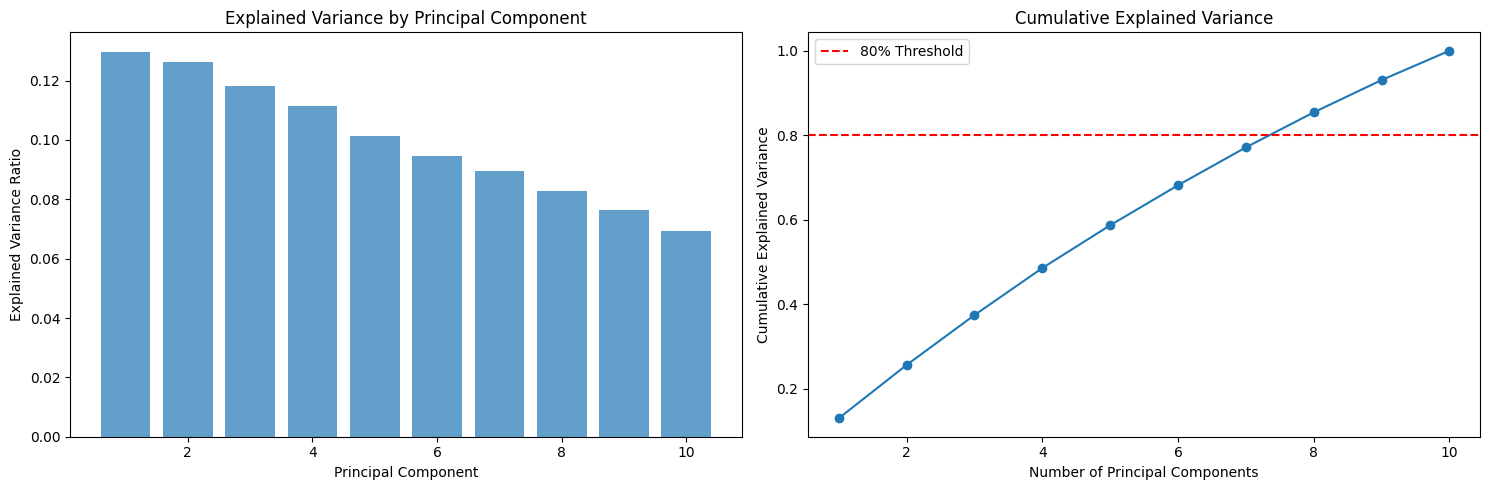

In [25]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot individual explained variance
ax1.bar(range(1, 11), explained_variance, alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Principal Component')

# Plot cumulative explained variance
ax2.plot(range(1, 11), cumulative_variance, marker='o')
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()

plt.tight_layout()
plt.show()


In [26]:
np.argmax(cumulative_variance >= 0.8)

7

In [34]:
'''Let's Determine Optimum number of Components 
(Here, we should have some knowledge about trade-off, 
we need to understand how many PCs are explaining how much of features variance)

Here, we want that our PCs should explain minimun 80% of features hence 0.8
'''
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f'Optimum Number of Principal Components are: {n_components}')

optimal_pca = PCA(n_components=n_components)
X_reduced = optimal_pca.fit_transform(data_scaled)
pca_names = [f'PC_{i}' for i in range(1, n_components+1)]
X_reduced = pd.DataFrame(X_reduced, columns=pca_names)
X_reduced

Optimum Number of Principal Components are: 8


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
0,-0.608644,0.648591,-0.072175,-0.444337,1.515293,0.005002,1.248249,-0.418846
1,-1.073402,1.159017,-0.121994,0.820826,0.047478,-1.578175,0.123857,-0.200666
2,3.572248,-0.295449,-1.034657,1.026109,0.119787,-1.210189,-1.721194,0.761288
3,0.086805,-0.265926,0.244082,-1.294192,-0.026054,-0.940777,-1.081355,-0.820460
4,-0.231393,0.499079,1.027510,-0.174641,0.120146,-0.553783,0.938371,0.104559
...,...,...,...,...,...,...,...,...
295,0.161488,2.218072,-1.953887,0.581817,1.456422,-0.181247,1.078760,0.494619
296,0.462633,0.567284,-1.321101,1.043802,-2.095308,0.419213,-0.515239,-0.224576
297,-1.657610,-0.353303,1.496595,-0.312358,-1.355619,-1.847308,-1.166085,1.819565
298,0.431698,3.018195,-1.309749,-0.370672,1.077577,-0.979813,-2.168515,-1.010136


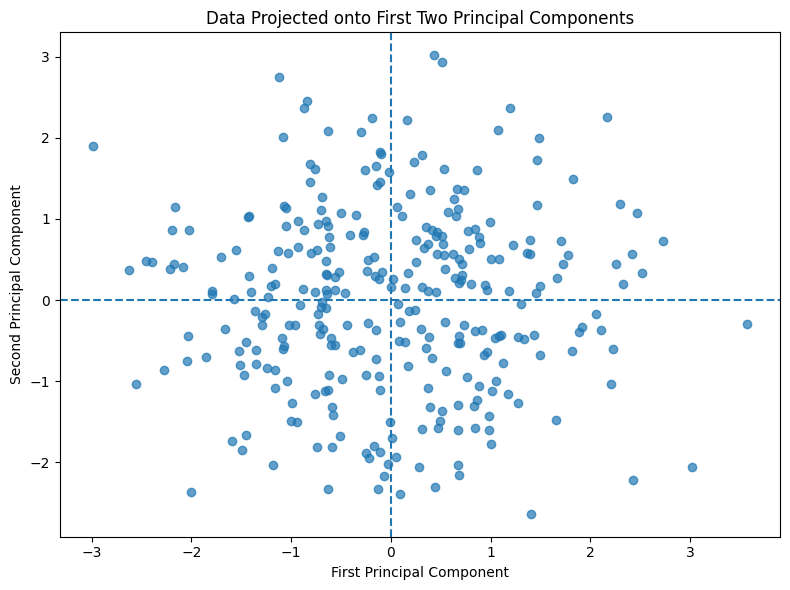

In [39]:
if n_components >= 2:
    plt.figure(figsize=(8,6))
    plt.scatter(X_reduced['PC_1'], X_reduced['PC_2'], alpha=0.7)
    plt.axhline(0, linestyle='--')
    plt.axvline(0, linestyle='--')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Data Projected onto First Two Principal Components')
    plt.tight_layout()
    plt.show()

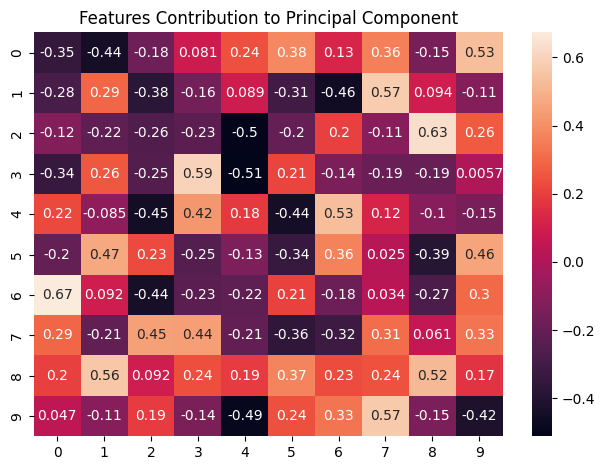

In [ ]:
#Next we have to see the loadings of components (eigenvectors)
loadings = pca.components_

loadings = pd.DataFrame(loadings)
plt.Figure(figsize=(8,8))
sns.heatmap(loadings, annot=True)
plt.title('Features Contribution to Principal Component')
plt.tight_layout()
plt.show()

'''Loading tells us, which original features contribute the most to each of principal components'''